In [25]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [26]:
df = pd.read_csv('data\liver.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,2,0.7,0.1,187,16,18,6.8,3.3,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,1


In [27]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,2


In [28]:
df.shape

(583, 10)

In [29]:
df.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Dataset                         int64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 45.7 KB


In [31]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,1.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.452490
min,4.000000,1.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,2.000000
max,90.000000,2.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.000000


In [32]:
df=df.drop_duplicates()

In [34]:
df.shape

(570, 10)

In [35]:
df['Dataset'].value_counts()

1    406
2    164
Name: Dataset, dtype: int64

In [36]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Dataset                       0
dtype: int64

In [37]:
x = df.drop(columns='Dataset',axis=1)
y = df['Dataset']

In [38]:
print(x)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       2              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [39]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 570, dtype: int64


In [40]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [41]:
stad_df = scaler.transform(x)

In [42]:
print(stad_df)

[[ 1.24174059  1.75254916 -0.41864741 ... -0.31442779  0.27928958
   0.18973749]
 [ 1.0568741  -0.5705974   1.21011064 ... -0.03227764  0.92305933
   0.06412731]
 [ 1.0568741  -0.5705974   0.63525486 ... -0.14238501  0.4632238
   0.18973749]
 ...
 [ 0.4406525  -0.5705974  -0.40267919 ... -0.20776127 -0.08857885
   0.06412731]
 [-0.85341287 -0.5705974  -0.32283811 ... -0.26625581  0.27928958
   0.31534768]
 [-0.42205774 -0.5705974  -0.37074276 ... -0.29378265  0.73912512
   1.57144955]]


In [43]:
x = stad_df
y = df['Dataset']

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [45]:
print(x_train.shape,x_test.shape)

(456, 9) (114, 9)


In [46]:
##using logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
prediction_lr = model.predict(x_test)
print(prediction_lr)

[1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 2 1 1]


In [48]:
accuracy_lr = accuracy_score(prediction_lr,y_test)
print(accuracy_lr)

0.7105263157894737


In [54]:
###using Support Vector Machine
import sklearn.svm as svm
classify = svm.SVC(kernel='linear')
classify.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
x_train_pred = classify.predict(x_train)
train_acc = accuracy_score(x_train_pred,y_train)
print(train_acc)

0.7127192982456141


In [51]:
prediction_svm = classify.predict(x_test)
accuracy_svm = accuracy_score(prediction_svm,y_test)
print(accuracy_svm)

0.7105263157894737


In [52]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.719298 (0.034199)
KNN: 0.685965 (0.075439)
CART: 0.635088 (0.066943)
RF: 0.687719 (0.039852)
SVM: 0.703509 (0.016551)
XGB: 0.680702 (0.046284)
[LightGBM] [Info] Number of positive: 148, number of negative: 365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 513, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288499 -> initscore=-0.902685
[LightGBM] [Info] Start training from score -0.902685
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

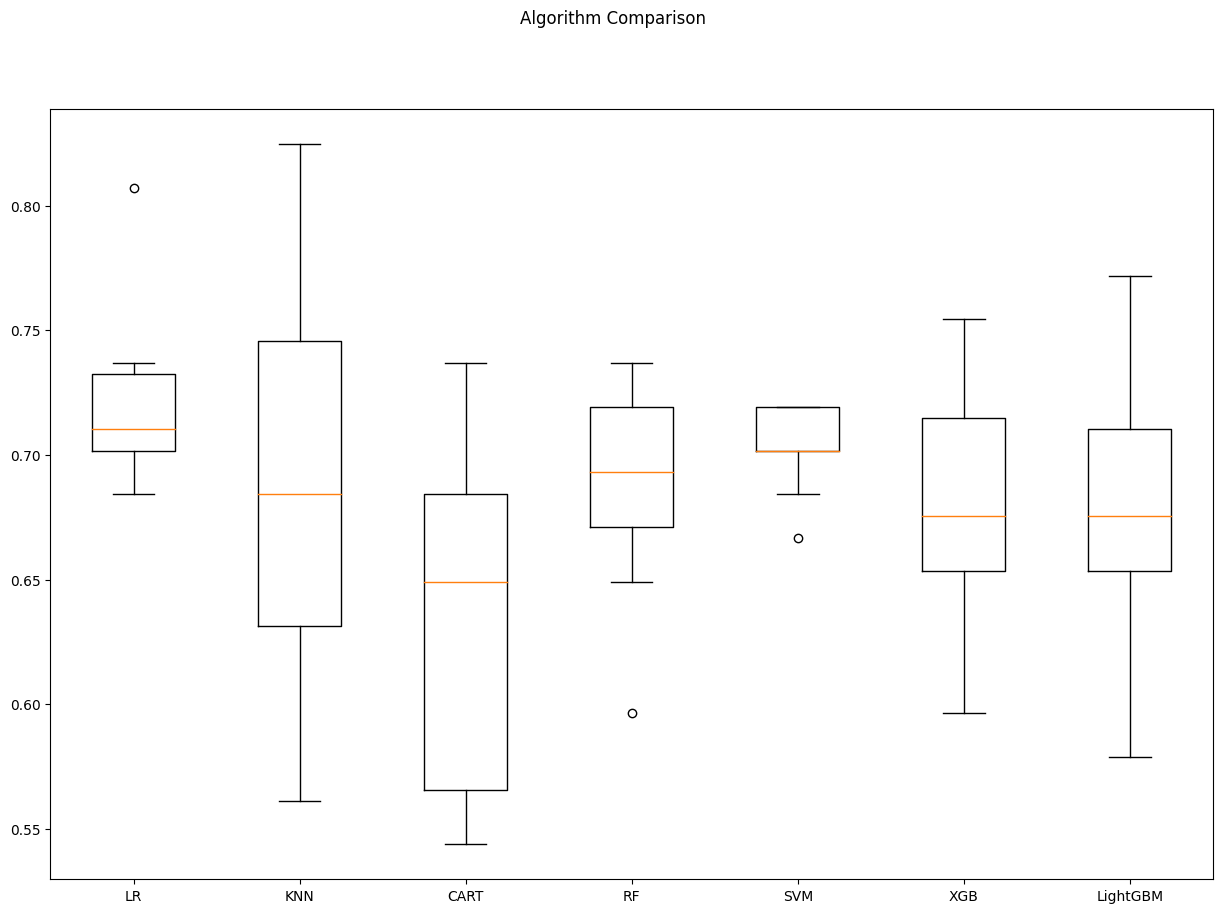

In [53]:
for name, model in models:
        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
prediction_rf = classifier.predict(x_test)
accuracy_rf = accuracy_score(prediction_rf,y_test)
print(accuracy_rf)

0.7017543859649122


In [ ]:
import pickle
filename = 'liver-prediction-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))